In [ ]:
import pandas as pd
import numpy as np
import math 
from scipy.stats import shapiro  
from scipy.stats import f    #prueba Shapiro Wilks, para distribucion betta 
from scipy.stats import  kstest
import numpy as np
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import expon
import matplotlib.pyplot as plt

url='/wine.csv'
df1 = pd.read_csv(url)


##**INCISO A**

**Medias, medianas y modas**

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Class: 
promedio : 1.9382022471910112 mediana : 2.0 moda : 0    2
dtype: int64 


Alcohol: 
promedio : 13.000617977528083 mediana : 13.05 moda : 0    12.37
1    13.05
dtype: float64 


Malic acid: 
promedio : 2.336348314606741 mediana : 1.8650000000000002 moda : 0    1.73
dtype: float64 


Ash: 
promedio : 2.3665168539325854 mediana : 2.36 moda : 0    2.28
1    2.30
dtype: float64 


Alcalinity: 
promedio : 19.49494382022472 mediana : 19.5 moda : 0    20.0
dtype: float64 


Magnesium: 
promedio : 99.74157303370787 mediana : 98.0 moda : 0    88
dtype: int64 


Phenols: 
promedio : 2.295112359550562 mediana : 2.355 moda : 0    2.2
dtype: float64 


Flavanoids: 
promedio : 2.0292696629213474 mediana : 2.135 moda : 0    2.65
dtype: float64 


Nonflavanoid phenols: 
promedio : 0.36185393258426973 mediana : 0.34 moda : 0    0.26
1    0.43
dtype: float64 


Proanthocyanins: 
promedio : 1.5908988764044953 mediana : 1.5550000000000002 moda : 0    1.35
dtype: float64 


Color: 
promedio : 5.0580

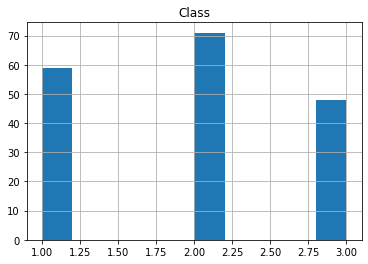

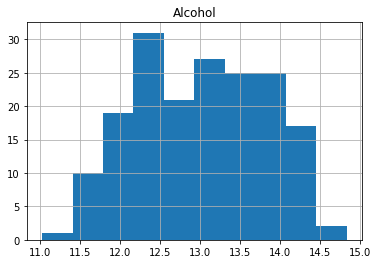

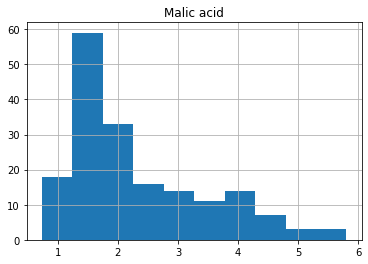

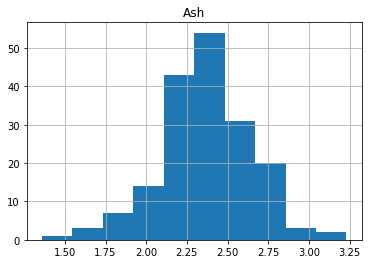

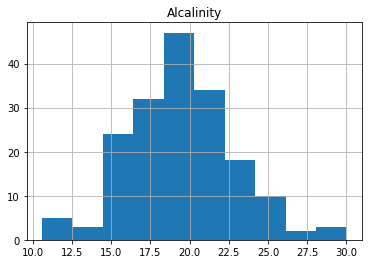

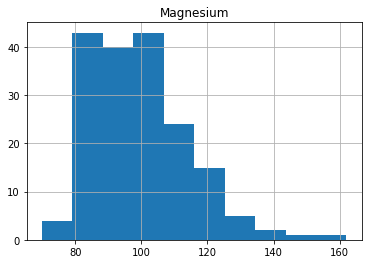

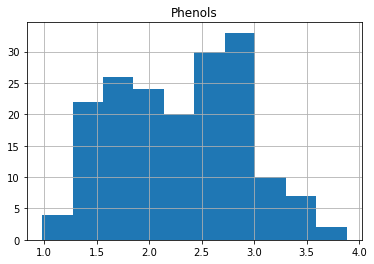

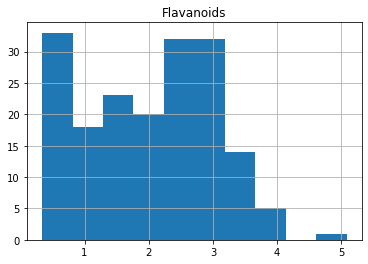

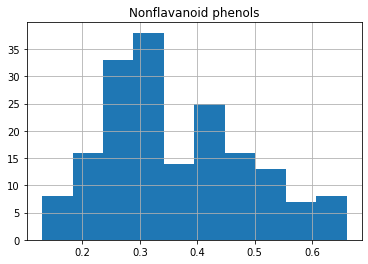

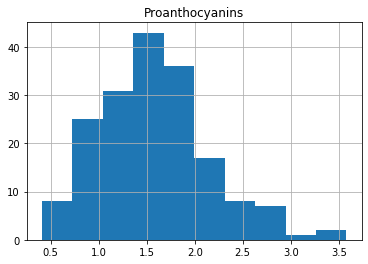

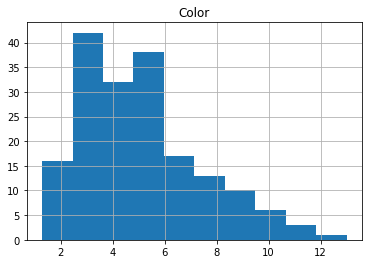

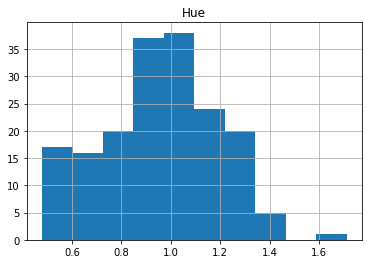

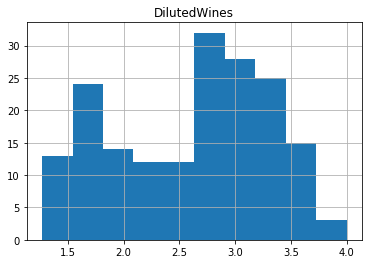

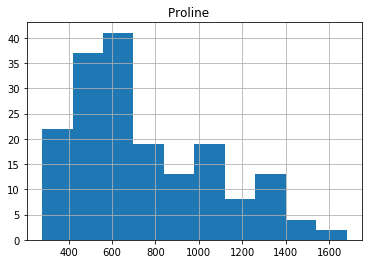

In [ ]:
for col in df1.columns:
  print(color.BOLD + color.UNDERLINE + col +": " + color.END + color.END )
  media=df1[col].mean()
  mediana=df1[col].median()
  moda=df1[col].mode()
  print(color.BLUE+ "promedio :"+ color.END,media,color.BLUE+ "mediana :" + color.END 
        ,mediana,color.BLUE+"moda :" + color.END, moda, "\n"*2)
  df1.hist(column=col)


#**INCISO B, C Y D**


##**CLASS**

,index,Class
0,2,71
1,1,59
2,3,48


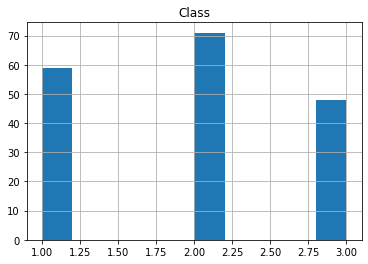

In [ ]:
#Es una variable categórica, por lo tanto sólo graficaremos la gráfica de barras. 
df1.hist(column="Class")


df = pd.value_counts(df1['Class']).to_frame().reset_index()
df

##**Alcohol**


Text(0.5, 1.0, "'Alcohol'. beta estimada, sh1= 2.95,  sh2 = 2.73, ,  loc = 10.84, ,  scale = 4.16")

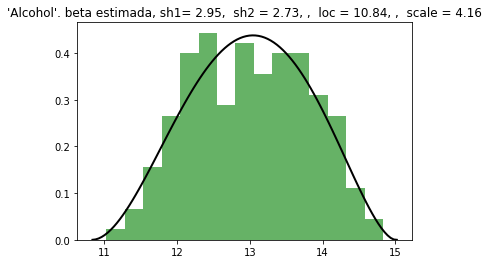

In [ ]:
#Alcohol 
#Muestra un comportamiento de distribución Beta. 
sh1,sh2,loc,scale=beta.fit(df1['Alcohol'])
plt.hist(df1['Alcohol'], bins=15, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = beta.pdf(x, sh1,sh2,loc,scale)
plt.plot(x, p, 'k', linewidth=2)
title = "'Alcohol'. beta estimada, sh1= %.2f,  sh2 = %.2f, ,  loc = %.2f, ,  scale = %.2f" % (sh1,sh2,loc,scale)
plt.title(title)


**OBSERVE QUE PASA LA PRUEBA Kolmogorv, es decir sí se distribuye Beta**

In [ ]:
print("PVALUE: ",kstest(df1['Alcohol'], 'beta', args=(sh1,sh2,loc,scale))[1])

PVALUE:  0.7765686159085954


In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = beta.ppf(.25,sh1,sh2,loc,scale), beta.ppf(.75,sh1,sh2,loc,scale)
li=[0]*(len(df1["Alcohol"]))
i=0
for i in range(len(df1['Alcohol'])):
  if c2<df1["Alcohol"][i] or c1>df1["Alcohol"][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1["alcohol_outlier"]=li

print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  100


##**Malic Acid**

Text(0.5, 1.0, "'Malic acid'. Beta estimada, a = 2.62,  b = 7.84, c=0.83, d=2.64")

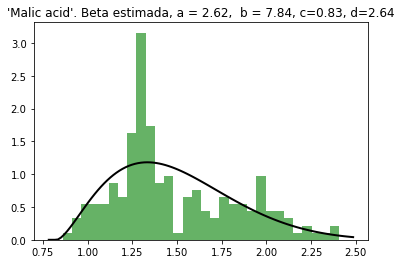

In [ ]:
##Malic acid muestra un comportamiento exponencial
a,b,c,d=beta.fit(np.sqrt(df1['Malic acid']))
plt.hist(np.sqrt(df1['Malic acid']), bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = beta.pdf(x, a, b,c,d)
plt.plot(x, p, 'k', linewidth=2)
title = "'Malic acid'. Beta estimada, a = %.2f,  b = %.2f, c=%.2f, d=%.2f" % (a,b,c,d)
plt.title(title)

In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = beta.ppf(.25,a,b,c,d), beta.ppf(.75,a,b,c,d)
li=[0]*(len(df1['Malic acid']))
df1['Malic acid']
i=0
for i in range(len(df1['Alcohol'])):
  if c2<math.sqrt(df1['Malic acid'][i]) or c1>math.sqrt(df1['Malic acid'][i]):   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1["Malic acid_outlier"]=li

print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  87


##**Ash**

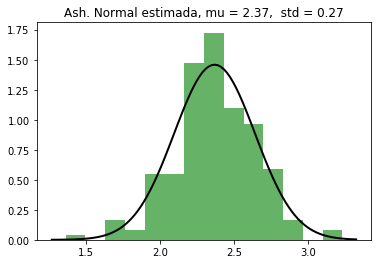

In [ ]:
##ASH Fit
#ajustamos los parametros
mu, std = norm.fit(df1['Ash'])

# grafica del histograma
plt.hist(df1['Ash'], bins=14, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Ash. Normal estimada, mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()



**Test Kolmogorov, aceptamos que se distribuye normal**

In [ ]:

print("PVALUE: ",kstest(df1['Ash'], 'norm', args=(mu,std))[1])

PVALUE:  0.5840565143781365


In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = norm.ppf(.25,mu,std), norm.ppf(.75,mu,std)
li=[0]*(len(df1['Malic acid']))

i=0
for i in range(len(df1['Alcohol'])):
  if c2<df1['Ash'][i] or c1>df1['Ash'][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1['Ash_outlier']=li

print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  81


##**Alcalinity**

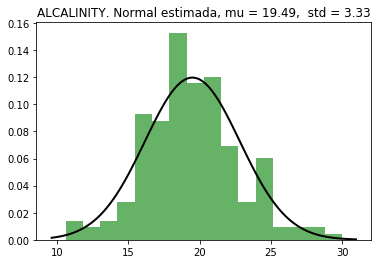

In [ ]:
#ajustamos los parametros, tiene un comporrtamiento normal
mu, std = norm.fit(df1['Alcalinity'])

# grafica del histograma
plt.hist(df1['Alcalinity'], bins=16, density=True, alpha=0.6, color='g')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "ALCALINITY. Normal estimada, mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

**Prueba de normalidad kolmogorov,  aceptamos la distribución**

In [ ]:
print("PVALUE: ",kstest(df1['Alcalinity'], 'norm', args=(mu,std))[1])

PVALUE:  0.46021602825042185


In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = norm.ppf(.25,mu,std), norm.ppf(.75,mu,std)
li=[0]*(len(df1['Malic acid']))

i=0
for i in range(len(df1['Alcohol'])):
  if c2<df1['Alcalinity'][i] or c1>df1['Alcalinity'][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1['Alcalinity_outliers']=li

print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  87


##**Magnesium**

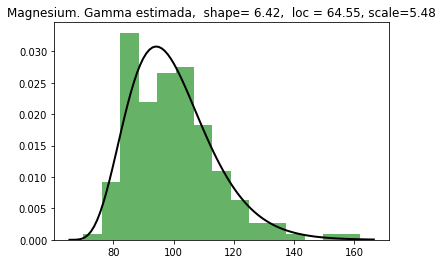

In [ ]:
#Magnesium, tiene un  comportamiento gamma
#ajustamos los parametros
a, b, c = gamma.fit(df1['Magnesium'])
# grafica del histograma
plt.hist(df1['Magnesium'], bins=15, density=True, alpha=0.6, color='g')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gamma.pdf(x, a, b,c)
plt.plot(x, p, 'k', linewidth=2)
title = "Magnesium. Gamma estimada,  shape= %.2f,  loc = %.2f, scale=%.2f" % (a,b,c)
plt.title(title)

plt.show()


**Test Kolmogorov, aceptamos la distibución gamma**

In [ ]:
print("PVALUE: ",kstest(df1['Magnesium'], 'gamma', args=(a,b,c))[1])

PVALUE:  0.5173724025721389


In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = gamma.ppf(.25,a,b,c), gamma.ppf(.75,a,b,c)
li=[0]*(len(df1['Malic acid']))

i=0
for i in range(len(df1['Alcohol'])):
  if c2<df1['Magnesium'][i] or c1>df1['Magnesium'][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1['Magnesium_outliers']=li
print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  96


##**Phenols**

Text(0.5, 1.0, 'KDE Phenoils')

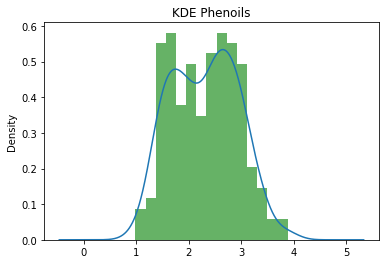

In [ ]:
#Phenols muestra una multimodalidad. 

plt.hist(df1['Phenols'], bins=15, density=True, alpha=0.6, color='g')
df1['Phenols'].plot.kde()
plt.title("KDE Phenoils")
#por lo tanto se le aplicara una transformacion logaritmica

Text(0.5, 1.0, 'KDE con tranformacion logaritmica, Phenols')

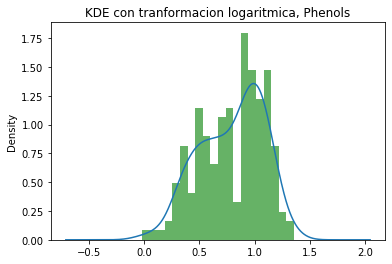

In [ ]:
#Phenols con logaritmos 
plt.hist(np.log(df1['Phenols']), bins=20, density=True, alpha=0.6, color='g')
np.log(df1['Phenols']).plot.kde()
plt.title("KDE con tranformacion logaritmica, Phenols") ##Dada la transformación logaritmica,vemos que desaparece la 
#multimodalidad, por tanto ajustaremos una betta


Text(0.5, 1.0, "'Phenols'. Beta estimada,, para la transf. logaritmica sh1= 4.20,  sh2 = 2.47, ,  loc = -0.23, ,  scale = 1.63")

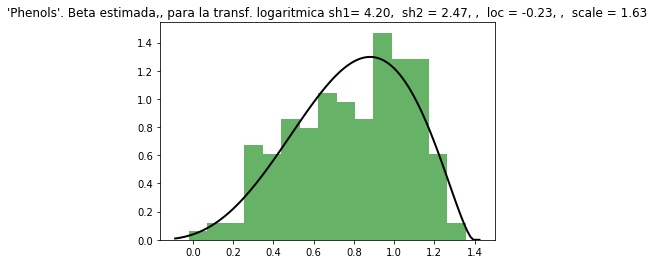

In [ ]:
#Muestra un comportamiento de distribución Beta. 
sh1,sh2,loc,scale=beta.fit(np.log(df1['Phenols']))
plt.hist(np.log(df1['Phenols']), bins=15, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = beta.pdf(x, sh1,sh2,loc,scale)
plt.plot(x, p, 'k', linewidth=2)
title = "'Phenols'. Beta estimada,, para la transf. logaritmica sh1= %.2f,  sh2 = %.2f, ,  loc = %.2f, ,  scale = %.2f" % (sh1,sh2,loc,scale)
plt.title(title)


**El test Kolmogorov muestra que la transformación logaritmica tiene distribución Beta**

In [ ]:
print("PVALUE: ",kstest(np.log(df1['Phenols']), 'beta', args=(sh1,sh2,loc,scale))[1])

PVALUE:  0.24840218930938282


In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = beta.ppf(.25,sh1,sh2,loc,scale), beta.ppf(.75,sh1,sh2,loc,scale)
li=[0]*(len(df1["Alcohol"]))
i=0
for i in range(len(df1['Alcohol'])):
  if math.exp(c2)<df1['Phenols'][i] or math.exp(c1)>df1['Phenols'][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1["Phenols_outlier"]=li

print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  100


##**Flavanoids**

(array([0.03116342, 0.09349027, 0.34279765, 0.34279765, 0.2804708 ,
        0.15581711, 0.15581711, 0.40512449, 0.40512449, 0.46745134,
        0.65443187, 1.02839294, 0.93490268, 0.21814396, 0.03116342]),
 array([-1.07880966, -0.89853493, -0.7182602 , -0.53798548, -0.35771075,
        -0.17743602,  0.00283871,  0.18311344,  0.36338816,  0.54366289,
         0.72393762,  0.90421235,  1.08448708,  1.26476181,  1.44503653,
         1.62531126]),
 <a list of 15 Patch objects>)

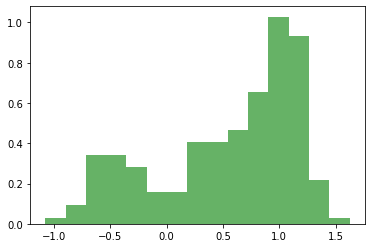

In [ ]:

#ajustamos los parametros
a, b, c,d = beta.fit(np.log(df1['Flavanoids']))
# grafica del histograma
plt.hist(np.log(df1['Flavanoids']), bins=15, density=True, alpha=0.6, color='g')



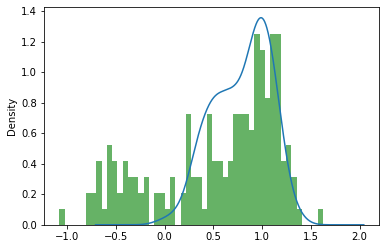

In [ ]:
plt.hist(np.log(df1['Flavanoids']), bins=50, density=True, alpha=0.6, color='g')
np.log(df1['Phenols']).plot.kde()

**Muestra una multimodalidad, a pesar de asiganarle distintas transformaciones, no se comportó como una distribucion conocida**


##**Nonflavanoids Phenols**

Text(0.5, 1.0, 'Nonflavanoid phenols. gamma estimada, a = 5.63,  b = 0.06, c=0.05')

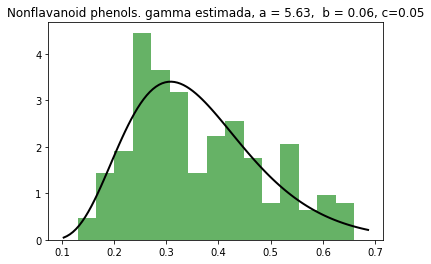

In [ ]:
##Nonflavanoid phenols acid muestra un comportamiento exponencial
a,b,c=gamma.fit(df1['Nonflavanoid phenols'])
plt.hist(df1['Nonflavanoid phenols'], bins=15, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gamma.pdf(x, a, b,c)
plt.plot(x, p, 'k', linewidth=2)
title = "Nonflavanoid phenols. gamma estimada, a = %.2f,  b = %.2f, c=%.2f" % (a,b,c)
plt.title(title)

**Por el p value obtenido podemos afirmar que se tiene una distribución gamma**

In [ ]:
print("PVALUE: ",kstest(df1['Nonflavanoid phenols'], 'gamma', args=(a,b,c))[1])

PVALUE:  0.3375554430082267


In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = gamma.ppf(.25,a,b,c), gamma.ppf(.75,a,b,c)
li=[0]*(len(df1['Malic acid']))

i=0
for i in range(len(df1['Alcohol'])):
  if c2<df1['Nonflavanoid phenols'][i] or c1>df1['Nonflavanoid phenols'][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1['NonflavanoidsPhenols_outliers']=li
print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  89


##**Proanthocyanins**

Text(0.5, 1.0, 'Proanthocyanins. gamma estimada, a = 16.73,  b = -0.74, c=0.14')

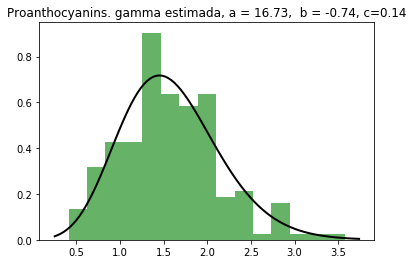

In [ ]:
#Proanthocyanins muestra un comportamiento exponencial
a,b,c=gamma.fit(df1['Proanthocyanins'])
plt.hist(df1['Proanthocyanins'], bins=15, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gamma.pdf(x, a, b,c)
plt.plot(x, p, 'k', linewidth=2)
title = "Proanthocyanins. gamma estimada, a = %.2f,  b = %.2f, c=%.2f" % (a,b,c)
plt.title(title)

**Por la prueba Kolomogorov, y el p value>0.05 aceptamos la distribucion gamma**

In [ ]:
print("PVALUE: ",kstest(df1['Proanthocyanins'], 'gamma', args=(a,b,c))[1])

PVALUE:  0.5867347791413938


In [ ]:

#Los cuartiles de la distribucion son:
c1, c2 = gamma.ppf(.25,a,b,c), gamma.ppf(.75,a,b,c)
li=[0]*(len(df1['Malic acid']))

i=0
for i in range(len(df1['Alcohol'])):
  if c2<df1['Proanthocyanins'][i] or c1>df1['Proanthocyanins'][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1['Proanthocyanins_outliers']=li
print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  89


##**Color**


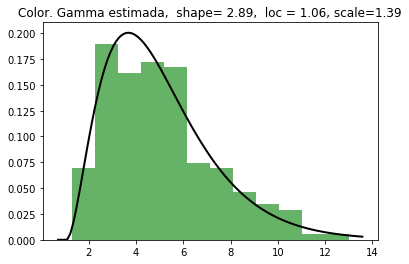

['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color', 'Hue', 'DilutedWines', 'Proline   ', 'alcohol_outlier', 'Malic acid_outlier', 'Ash_outlier', 'Alcalinity_outliers', 'Magnesium_outliers', 'Phenols_outlier', 'NonflavanoidsPhenols_outliers', 'Proanthocyanins_outliers']


In [ ]:
#COLOR

#ajustamos los parametros
a, b, c = gamma.fit(df1['Color'])
# grafica del histograma
plt.hist(df1['Color'], bins=12, density=True, alpha=0.6, color='g')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gamma.pdf(x, a, b,c)
plt.plot(x, p, 'k', linewidth=2)
title = "Color. Gamma estimada,  shape= %.2f,  loc = %.2f, scale=%.2f" % (a,b,c)
plt.title(title)

plt.show()

print(df1.columns.tolist())

**Test Kolmogorov, da un p value mayor a 0.05, por tanto aceptamos que Color se distribuye Gamma**


In [ ]:
print("PVALUE: ",kstest(df1['Color'], 'gamma', args=(a,b,c))[1])

PVALUE:  0.8742870476533023


In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = gamma.ppf(.25,a,b,c), gamma.ppf(.75,a,b,c)
li=[0]*(len(df1['Malic acid']))

i=0
for i in range(len(df1['Alcohol'])):
  if c2<df1['Color'][i] or c1>df1['Color'][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1['Color_outliers']=li
print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  92


##**Hue**

Text(0.5, 1.0, "'Hue'. Beta estimada, a = 3.93,  b = 6.14, c=0.34")

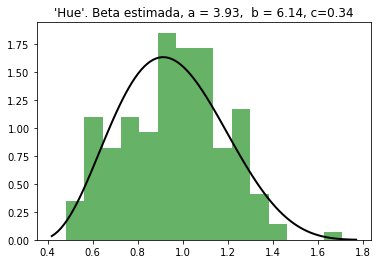

In [ ]:
#Hue muestra un comportamiento exponencial
a,b,c,d=beta.fit(df1['Hue'])
plt.hist(df1['Hue'], bins=15, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = beta.pdf(x, a, b,c,d)
plt.plot(x, p, 'k', linewidth=2)
title = "'Hue'. Beta estimada, a = %.2f,  b = %.2f, c=%.2f" % (a,b,c)
plt.title(title)

**Observe que pasa la prueba Kolmogorov, ie, se distribuye beta**

In [ ]:
print("PVALUE: ",kstest(df1['Hue'], 'beta', args=(a,b,c,d))[1])

PVALUE:  0.3309087624276583


In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = beta.ppf(.25,a,b,c,d), beta.ppf(.75,a,b,c,d)
li=[0]*(len(df1["Alcohol"]))
i=0
for i in range(len(df1['Alcohol'])):
  if c2<df1['Hue'][i] or c1>df1['Hue'][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1["Hue_outlier"]=li

print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  92


##**DilutedWines**

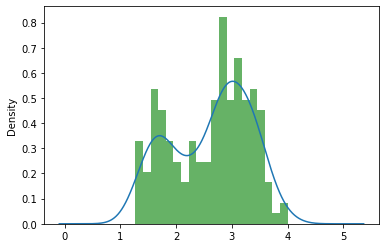

In [ ]:
#Hue muestra un comportamiento multimodal
plt.hist(df1['DilutedWines'], bins=20, density=True, alpha=0.6, color='g')
df1['DilutedWines'].plot.kde()

**A pesar de las multiples transformaciones aplicadas no se consiguió ajustar una distribución conocida, por la multimodalidad de los datos mostrados graficamente.**

##**Proline**

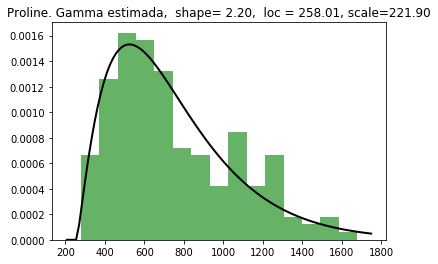

['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color', 'Hue', 'DilutedWines', 'Proline   ', 'alcohol_outlier', 'Malic acid_outlier', 'Ash_outlier', 'Alcalinity_outliers', 'Magnesium_outliers', 'Phenols_outlier', 'NonflavanoidsPhenols_outliers', 'Proanthocyanins_outliers', 'Color_outliers', 'Hue_outlier']


In [ ]:
#PROLINE FIT
#ajustamos los parametros
a, b, c = gamma.fit(df1['Proline   '])
# grafica del histograma
plt.hist(df1['Proline   '], bins=15, density=True, alpha=0.6, color='g')


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gamma.pdf(x, a, b,c)
plt.plot(x, p, 'k', linewidth=2)
title = "Proline. Gamma estimada,  shape= %.2f,  loc = %.2f, scale=%.2f" % (a,b,c)
plt.title(title)

plt.show()

print(df1.columns.tolist())

**Por el test Kolmogorov aceptamos la distribucion gamma***

In [ ]:
print("PVALUE: ",kstest(df1['Proline   '], 'gamma', args=(a,b,c))[1])

PVALUE:  0.4782860090037755


In [ ]:
#inciso D. 
#Los cuartiles de la distribucion son:
c1, c2 = gamma.ppf(.25,a,b,c), gamma.ppf(.75,a,b,c)
li=[0]*(len(df1['Proline   ']))

i=0
for i in range(len(df1['Proline   '])):
  if c2<df1['Proline   '][i] or c1>df1['Proline   '][i]:   #con esta condicion vemos si esta fuera de los cuartiles. 
    li[i]=1
df1['Proline_outliers']=li
print(color.BOLD + color.UNDERLINE +  "numero de outliers es: " + color.END, sum(li) )

numero de outliers es:  96
